# Anscombe's Quartet

Set of four scatter plots that are identical in terms of simple descriptive statistics, but clearly very different. Here is the [Wikipedia article](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

It's even mentioned in the [Matplotlib documentation](https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html)!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = {
    'I_x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'I_y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    'II_x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'II_y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
    'III_x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'III_y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    'IV_x': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    'IV_y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
}

df = pd.DataFrame(data)
df

,I_x,I_y,II_x,II_y,III_x,III_y,IV_x,IV_y
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


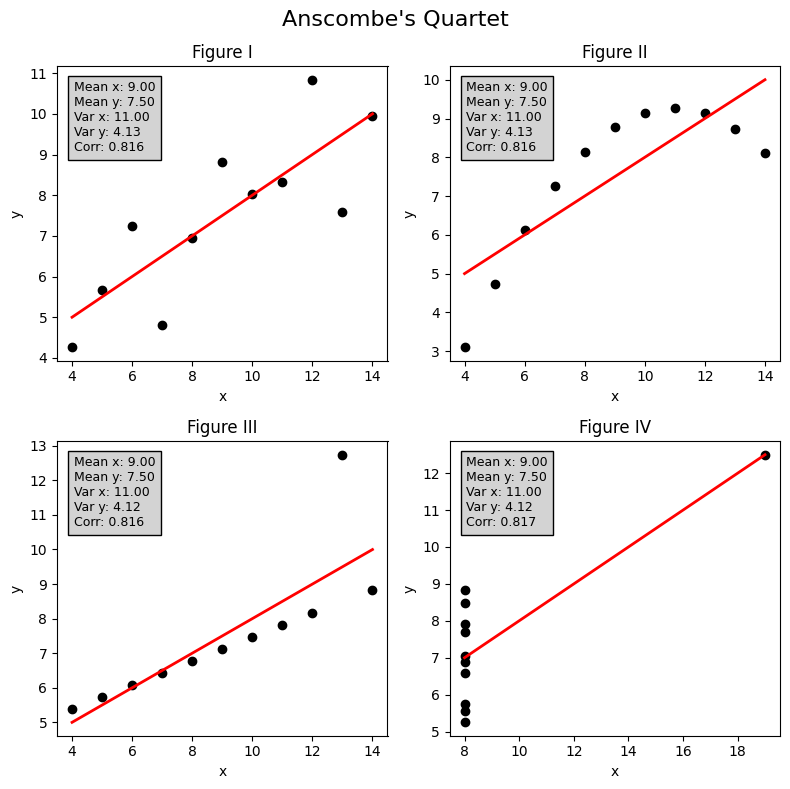

In [ ]:
figures = ['I', 'II', 'III', 'IV']

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()

fig.suptitle("Anscombe's Quartet", fontsize=16)

for ax, figure in zip(axs, figures):
    x = df[f'{figure}_x']
    y = df[f'{figure}_y']
    
    # Calculate statistics
    mean_x = x.mean()
    mean_y = y.mean()
    var_x = x.var(ddof=1)  # Sample variance
    var_y = y.var(ddof=1)  # Sample variance
    corr = x.corr(y)
    
    # Calculate linear regression
    coeffs = np.polyfit(x, y, 1)
    poly = np.poly1d(coeffs)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = poly(x_line)
    
    # Plot
    ax.set_title(f'Figure {figure}', fontsize=12)
    ax.scatter(x, y, color='black')
    ax.plot(x_line, y_line, 'r-', linewidth=2, label='Linear Regression')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Add statistics text
    stats_text = f'Mean x: {mean_x:.2f}\n'
    stats_text += f'Mean y: {mean_y:.2f}\n'
    stats_text += f'Var x: {var_x:.2f}\n'
    stats_text += f'Var y: {var_y:.2f}\n'
    stats_text += f'Corr: {corr:.3f}'
    
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes,
            fontsize=9, verticalalignment='top',
            bbox=dict(facecolor='lightgrey'))

plt.tight_layout()
plt.show()